<table align="center">
  <td>
    <a href="https://colab.research.google.com/github/BUFONJOKER/mobile_dataset_analysis/blob/master/mobiles_dataset_eda.ipynb" target="_parent">
      <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"
      style="height:50px; width:auto;"/>
    </a>
  </td>
</table>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# df = pd.read_csv("/content/Mobiles Dataset (2025).csv", encoding='ISO-8859-1')
df_copy = pd.read_csv("dataset/Mobiles Dataset (2025).csv", encoding='ISO-8859-1')
df = df_copy.copy()

In [3]:
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [4]:
df.dtypes

Company Name                 object
Model Name                   object
Mobile Weight                object
RAM                          object
Front Camera                 object
Back Camera                  object
Processor                    object
Battery Capacity             object
Screen Size                  object
Launched Price (Pakistan)    object
Launched Price (India)       object
Launched Price (China)       object
Launched Price (USA)         object
Launched Price (Dubai)       object
Launched Year                 int64
dtype: object

In [5]:
df.columns

Index(['Company Name', 'Model Name', 'Mobile Weight', 'RAM', 'Front Camera',
       'Back Camera', 'Processor', 'Battery Capacity', 'Screen Size',
       'Launched Price (Pakistan)', 'Launched Price (India)',
       'Launched Price (China)', 'Launched Price (USA)',
       'Launched Price (Dubai)', 'Launched Year'],
      dtype='object')

In [6]:
df.rename(columns={
    'Mobile Weight': 'Mobile Weight (gram)',
    'RAM': 'RAM (GB)',
    'Front Camera': 'Front Camera (MP)',
    'Back Camera': 'Back Camera (MP)',
    'Battery Capacity': 'Battery Capacity (mAh)',
    'Screen Size': 'Screen Size (inch)',
    'Launched Price (Pakistan)': 'Launched Price (Pakistan USD)',
    'Launched Price (India)': 'Launched Price (India USD)',
    'Launched Price (China)': 'Launched Price (China USD)',
    'Launched Price (USA)': 'Launched Price (USA USD)',
    'Launched Price (Dubai)': 'Launched Price (Dubai USD)'
},inplace=True)

In [7]:
df.isnull().sum()

Company Name                     0
Model Name                       0
Mobile Weight (gram)             0
RAM (GB)                         0
Front Camera (MP)                0
Back Camera (MP)                 0
Processor                        0
Battery Capacity (mAh)           0
Screen Size (inch)               0
Launched Price (Pakistan USD)    0
Launched Price (India USD)       0
Launched Price (China USD)       0
Launched Price (USA USD)         0
Launched Price (Dubai USD)       0
Launched Year                    0
dtype: int64

In [8]:
df[df.duplicated()]

,Company Name,Model Name,Mobile Weight (gram),RAM (GB),Front Camera (MP),Back Camera (MP),Processor,Battery Capacity (mAh),Screen Size (inch),Launched Price (Pakistan USD),Launched Price (India USD),Launched Price (China USD),Launched Price (USA USD),Launched Price (Dubai USD),Launched Year
347,Oppo,A3 128GB,186g,4GB,5MP,50MP,Snapdragon 6s 4G Gen 1,5000mAh,6.7 inches,"PKR 59,999","INR 34,999","CNY 2,999",USD 399,"AED 1,499",2024
437,Oppo,K11x 128GB,195g,8GB,16MP,108MP + 2MP,Qualcomm Snapdragon 695,"5,000mAh",6.72 inches,"PKR 59,999","INR 18,000","CNY 1,499",USD 199,"AED 1,000",2023
438,Oppo,K11x 256GB,195g,12GB,16MP,108MP + 2MP,Qualcomm Snapdragon 695,"5,000mAh",6.72 inches,"PKR 64,999","INR 20,000","CNY 1,699",USD 229,"AED 1,200",2023
441,Oppo,K10x 128GB,195g,6GB,16MP,64MP + 2MP + 2MP,Qualcomm Snapdragon 695,"5,000mAh",6.59 inches,"PKR 54,999","INR 16,990","CNY 1,499",USD 199,"AED 1,000",2022
442,Oppo,K10x 256GB,195g,8GB,16MP,64MP + 2MP + 2MP,Qualcomm Snapdragon 695,"5,000mAh",6.59 inches,"PKR 59,999","INR 18,990","CNY 1,699",USD 229,"AED 1,200",2022
443,Oppo,K10 5G 128GB,205g,8GB,16MP,64MP + 8MP + 2MP,MediaTek Dimensity 8000-Max,"5,000mAh",6.59 inches,"PKR 64,999","INR 19,999","CNY 1,799",USD 249,"AED 1,300",2022
445,Oppo,K9x 128GB,194g,6GB,16MP,64MP + 2MP + 2MP,MediaTek Dimensity 810,"5,000mAh",6.5 inches,"PKR 49,999","INR 15,999","CNY 1,499",USD 199,"AED 1,000",2021
446,Oppo,K9x 256GB,194g,8GB,16MP,64MP + 2MP + 2MP,MediaTek Dimensity 810,"5,000mAh",6.5 inches,"PKR 54,999","INR 17,999","CNY 1,699",USD 229,"AED 1,200",2021
447,Oppo,K9 Pro 5G 128GB,180g,8GB,16MP,64MP + 8MP + 2MP,MediaTek Dimensity 1200,"4,500mAh",6.43 inches,"PKR 69,999","INR 24,999","CNY 2,199",USD 299,"AED 1,500",2021
448,Oppo,K9 Pro 5G 256GB,180g,12GB,16MP,64MP + 8MP + 2MP,MediaTek Dimensity 1200,"4,500mAh",6.43 inches,"PKR 74,999","INR 27,999","CNY 2,499",USD 329,"AED 1,700",2021


In [9]:
df[df.duplicated(keep=False)]

,Company Name,Model Name,Mobile Weight (gram),RAM (GB),Front Camera (MP),Back Camera (MP),Processor,Battery Capacity (mAh),Screen Size (inch),Launched Price (Pakistan USD),Launched Price (India USD),Launched Price (China USD),Launched Price (USA USD),Launched Price (Dubai USD),Launched Year
344,Oppo,A3 128GB,186g,4GB,5MP,50MP,Snapdragon 6s 4G Gen 1,5000mAh,6.7 inches,"PKR 59,999","INR 34,999","CNY 2,999",USD 399,"AED 1,499",2024
347,Oppo,A3 128GB,186g,4GB,5MP,50MP,Snapdragon 6s 4G Gen 1,5000mAh,6.7 inches,"PKR 59,999","INR 34,999","CNY 2,999",USD 399,"AED 1,499",2024
423,Oppo,K11x 128GB,195g,8GB,16MP,108MP + 2MP,Qualcomm Snapdragon 695,"5,000mAh",6.72 inches,"PKR 59,999","INR 18,000","CNY 1,499",USD 199,"AED 1,000",2023
424,Oppo,K11x 256GB,195g,12GB,16MP,108MP + 2MP,Qualcomm Snapdragon 695,"5,000mAh",6.72 inches,"PKR 64,999","INR 20,000","CNY 1,699",USD 229,"AED 1,200",2023
425,Oppo,K10x 128GB,195g,6GB,16MP,64MP + 2MP + 2MP,Qualcomm Snapdragon 695,"5,000mAh",6.59 inches,"PKR 54,999","INR 16,990","CNY 1,499",USD 199,"AED 1,000",2022
426,Oppo,K10x 256GB,195g,8GB,16MP,64MP + 2MP + 2MP,Qualcomm Snapdragon 695,"5,000mAh",6.59 inches,"PKR 59,999","INR 18,990","CNY 1,699",USD 229,"AED 1,200",2022
427,Oppo,K10 5G 128GB,205g,8GB,16MP,64MP + 8MP + 2MP,MediaTek Dimensity 8000-Max,"5,000mAh",6.59 inches,"PKR 64,999","INR 19,999","CNY 1,799",USD 249,"AED 1,300",2022
428,Oppo,K9x 128GB,194g,6GB,16MP,64MP + 2MP + 2MP,MediaTek Dimensity 810,"5,000mAh",6.5 inches,"PKR 49,999","INR 15,999","CNY 1,499",USD 199,"AED 1,000",2021
429,Oppo,K9x 256GB,194g,8GB,16MP,64MP + 2MP + 2MP,MediaTek Dimensity 810,"5,000mAh",6.5 inches,"PKR 54,999","INR 17,999","CNY 1,699",USD 229,"AED 1,200",2021
430,Oppo,K9 Pro 5G 128GB,180g,8GB,16MP,64MP + 8MP + 2MP,MediaTek Dimensity 1200,"4,500mAh",6.43 inches,"PKR 69,999","INR 24,999","CNY 2,199",USD 299,"AED 1,500",2021


In [10]:
df.drop_duplicates(keep=False,inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.head()

,Company Name,Model Name,Mobile Weight (gram),RAM (GB),Front Camera (MP),Back Camera (MP),Processor,Battery Capacity (mAh),Screen Size (inch),Launched Price (Pakistan USD),Launched Price (India USD),Launched Price (China USD),Launched Price (USA USD),Launched Price (Dubai USD),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [13]:
df['Mobile Weight (gram)'] = df['Mobile Weight (gram)'].apply(lambda x: x.replace('g',''))

In [14]:
df['Mobile Weight (gram)'].value_counts()

Mobile Weight (gram)
190      68
195      54
185      29
192      26
198      22
         ..
288       1
495       1
505       1
475       1
178.8     1
Name: count, Length: 148, dtype: int64

In [15]:
df['Mobile Weight (gram)'] = pd.to_numeric(df['Mobile Weight (gram)'], errors='coerce')

In [16]:
df['Mobile Weight (gram)'].value_counts()

Mobile Weight (gram)
190.0    68
195.0    54
185.0    29
192.0    26
198.0    22
         ..
288.0     1
495.0     1
505.0     1
475.0     1
178.8     1
Name: count, Length: 148, dtype: int64

In [17]:
df['RAM (GB)'] = df['RAM (GB)'].apply(lambda x:x.replace('GB',''))

In [18]:
df['RAM (GB)'] = pd.to_numeric(df['RAM (GB)'], errors='coerce')

In [19]:
df['RAM (GB)'].value_counts()

RAM (GB)
8.0     292
6.0     200
12.0    189
4.0     144
3.0      32
16.0     31
2.0       6
1.5       2
10.0      1
1.0       1
Name: count, dtype: int64

In [20]:
df['Battery Capacity (mAh)'].value_counts()

Battery Capacity (mAh)
5,000mAh    179
5000mAh      94
4,500mAh     42
4500mAh      38
5,200mAh     35
           ... 
7,500mAh      1
8,300mAh      1
8,850mAh      1
5065mAh       1
5110mAh       1
Name: count, Length: 147, dtype: int64

In [21]:
df['Battery Capacity (mAh)'] = df['Battery Capacity (mAh)'].apply(lambda x:x.replace('mAh',''))

In [25]:
df.loc[925, 'Battery Capacity (mAh)']

'10,000'

In [27]:
df[df['Battery Capacity (mAh)'].str.contains(' ')]

,Company Name,Model Name,Mobile Weight (gram),RAM (GB),Front Camera (MP),Back Camera (MP),Processor,Battery Capacity (mAh),Screen Size (inch),Launched Price (Pakistan USD),Launched Price (India USD),Launched Price (China USD),Launched Price (USA USD),Launched Price (Dubai USD),Launched Year


In [23]:
df['Battery Capacity (mAh)'] = (
    df['Battery Capacity (mAh)']
    .astype(str)
    .str.replace(',','' ,regex=False)
    .str.strip()
)
df['Battery Capacity (mAh)'] = pd.to_numeric(df['Battery Capacity (mAh)'], errors='coerce')

In [24]:
df['Battery Capacity (mAh)'].isnull().sum()

np.int64(0)

In [25]:
df['Screen Size (inch)'] = (
    df['Screen Size (inch)']
    .astype(str)
    .str.replace(r'inches.*','',regex=True)
    .str.strip()
)
df['Screen Size (inch)'] = pd.to_numeric(df['Screen Size (inch)'], errors='coerce')

In [26]:
df['Screen Size (inch)'].isnull().sum()

np.int64(0)

In [28]:
df['Battery Capacity (mAh)'] = pd.to_numeric(df['Battery Capacity (mAh)'], errors='coerce')

In [32]:
df['Battery Capacity (mAh)'].isnull().sum()

np.int64(587)

In [12]:
columns_usd = {'Launched Price (Pakistan)':281,
               'Launched Price (India)':87.82,
               'Launched Price (China)':7.12,
               'Launched Price (USA)':1,
               'Launched Price (Dubai)':3.67
               }
for key,value in columns_usd.items():
  df[key] = df[key].astype(float)/value

In [14]:
df['Screen Size (inch)'].value_counts()

Screen Size (inch)
67     123
65      73
667     69
66      63
678     61
      ... 
671      1
663      1
120      1
135      1
679      1
Name: count, Length: 94, dtype: int64

In [ ]:
df['Screen Size (inch)'] = df['Screen Size (inch)'] /10

In [ ]:
columns = ['Launched Price (Pakistan USD)', 'Launched Price (India USD)',
       'Launched Price (China USD)', 'Launched Price (USA USD)',
       'Launched Price (Dubai USD)']
for col in columns:
  df[col] = df[col].fillna(0).astype('int64')

In [79]:
df.head(5)

,Company Name,Model Name,Mobile Weight (gram),RAM (GB),Front Camera (MP),Back Camera (MP),Processor,Battery Capacity (mAh),Screen Size (inch),Launched Price (Pakistan USD),Launched Price (India USD),Launched Price (China USD),Launched Price (USA USD),Launched Price (Dubai USD),Launched Year
0,Apple,iPhone 16 128GB,174,6,12,48,A17 Bionic,3600,6.1,800,910,814,799,762,2024
1,Apple,iPhone 16 256GB,174,6,12,48,A17 Bionic,3600,6.1,836,967,856,849,817,2024
2,Apple,iPhone 16 512GB,174,6,12,48,A17 Bionic,3600,6.1,871,1024,912,899,871,2024
3,Apple,iPhone 16 Plus 128GB,203,6,12,48,A17 Bionic,4200,6.7,889,1024,870,899,871,2024
4,Apple,iPhone 16 Plus 256GB,203,6,12,48,A17 Bionic,4200,6.7,925,1081,912,949,926,2024


In [ ]:
df['Country'] = ''

In [81]:
df.drop(labels='Country', inplace=True, axis=1)

In [82]:
df['Company Name'].value_counts()

Company Name
Oppo        115
Apple        97
Honor        91
Samsung      88
Vivo         86
Realme       69
Motorola     62
Infinix      55
OnePlus      53
Huawei       42
Tecno        39
POCO         30
Xiaomi       27
Google       21
Lenovo       15
Nokia        11
Sony          9
iQOO          3
Poco          2
Name: count, dtype: int64

In [83]:
df.columns

Index(['Company Name', 'Model Name', 'Mobile Weight (gram)', 'RAM (GB)',
       'Front Camera (MP)', 'Back Camera (MP)', 'Processor',
       'Battery Capacity (mAh)', 'Screen Size (inch)',
       'Launched Price (Pakistan USD)', 'Launched Price (India USD)',
       'Launched Price (China USD)', 'Launched Price (USA USD)',
       'Launched Price (Dubai USD)', 'Launched Year'],
      dtype='object')

In [84]:
df[df['Mobile Weight (gram)'] >= 800]

,Company Name,Model Name,Mobile Weight (gram),RAM (GB),Front Camera (MP),Back Camera (MP),Processor,Battery Capacity (mAh),Screen Size (inch),Launched Price (Pakistan USD),Launched Price (India USD),Launched Price (China USD),Launched Price (USA USD),Launched Price (Dubai USD),Launched Year
84,Apple,iPad Mini 7.9-inch 64GB,3005,3,7,8,A12 Bionic,5124,7.9,249,454,491,399,408,2019
85,Apple,iPad Mini 7.9-inch 256GB,3005,3,7,8,A12 Bionic,5124,7.9,284,568,533,499,490,2019
453,Realme,GT 7 Pro 128GB,2228,12,16,50508,Qualcomm Snapdragon 8 Elite,6500,67.8,498,683,477,470,470,2024
454,Realme,GT 7 Pro 256GB,2228,16,16,50508,Qualcomm Snapdragon 8 Elite,6500,67.8,533,751,505,500,501,2024
910,POCO,M5s 128GB,1788,4,13,64,MediaTek Helio G95,5000,64.3,124,159,196,229,244,2022


In [85]:
# df['Mobile Weight (gram)'] /= 10

In [102]:
df['Mobile Weight (gram)'] = df['Mobile Weight (gram)'].astype(float)
df.loc[df['Mobile Weight (gram)']>=1000, "Mobile Weight (gram)"]/=10

In [104]:
df['Mobile Weight (gram)'].value_counts()

Mobile Weight (gram)
190.0    68
195.0    59
185.0    29
192.0    26
198.0    22
         ..
288.0     1
495.0     1
505.0     1
475.0     1
178.8     1
Name: count, Length: 148, dtype: int64

<Axes: xlabel='Launched Year', ylabel='Count'>

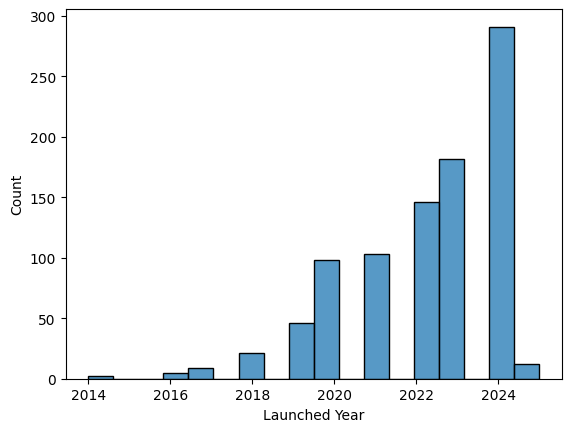

In [87]:
sns.histplot(df['Launched Year'])

<Axes: xlabel='count', ylabel='Company Name'>

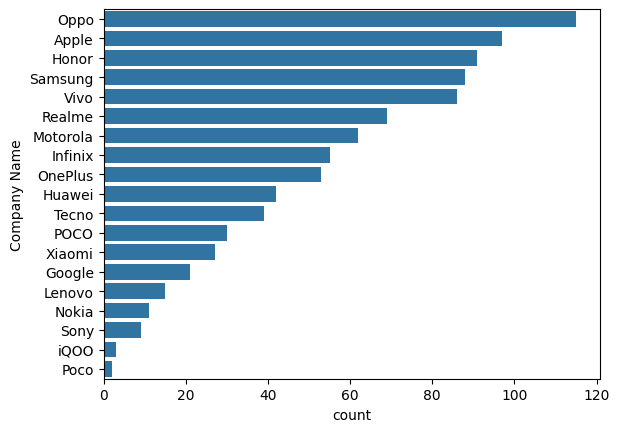

In [88]:
sns.countplot(df['Company Name'], order=df['Company Name'].value_counts().index)

<Axes: xlabel='RAM (GB)', ylabel='Company Name'>

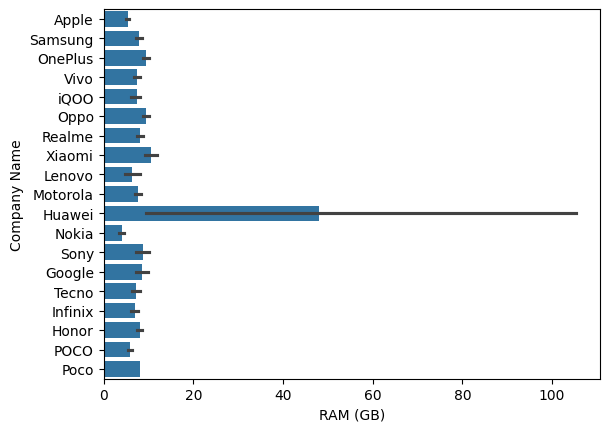

In [89]:
sns.barplot(x='RAM (GB)', y='Company Name', data=df)

<Axes: >

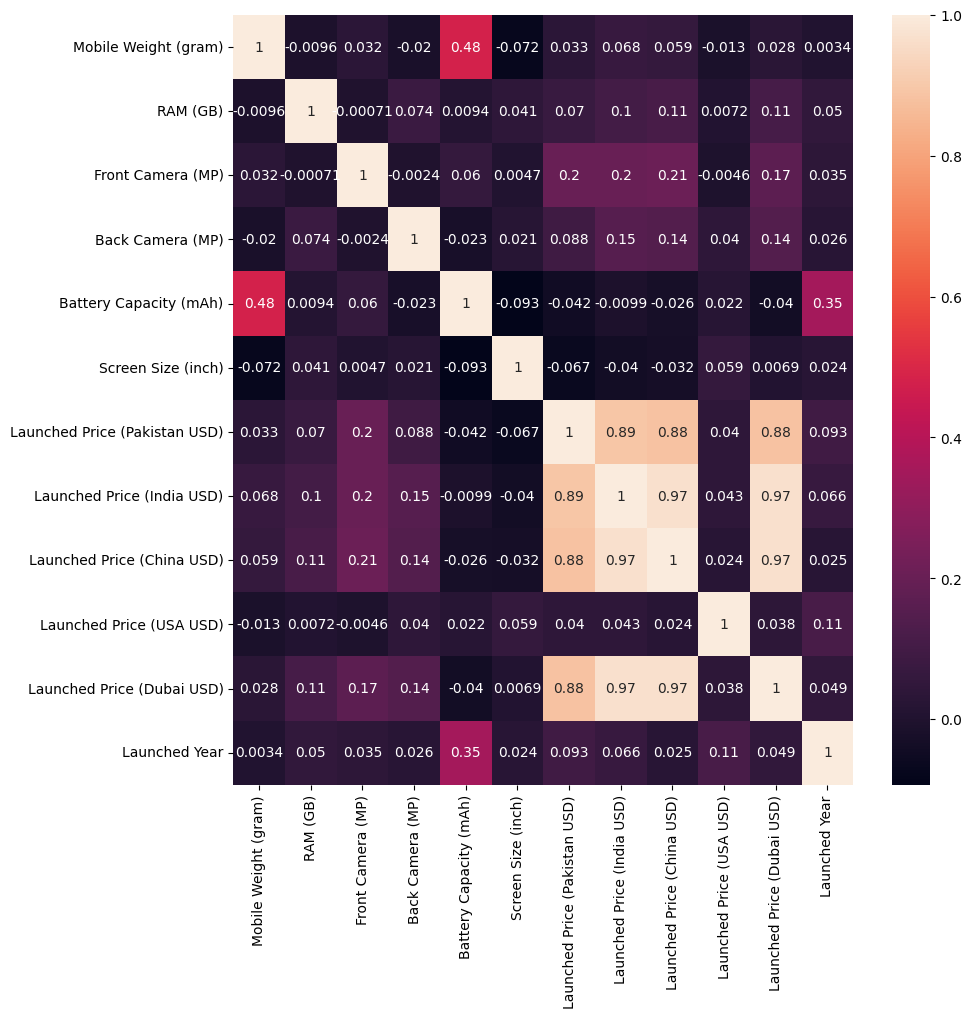

In [90]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)